In [1]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [2]:
# Load the nou_hearings

nou_hearings = pd.read_csv('../../dataset/nou_hearings_full.csv')

# Sample of the data

nou_hearings_sample = nou_hearings.sample(20)
nou_hearings_sample

,actor,paragraph,date
2637,Skagerak Energi,Batterier og energilagring blir stadig mer sen...,28.02.2024
2335,Naturvernforbundet,"Innovasjon, omstilling og næringsstruktur Særl...",28.02.2024
896,Innlandet fylkeskommune,En lønnsom bioøkonomi er avgjørende for den gr...,27.02.2024
279,Bergen INP,s. 81 i rapporten blir det lagt til grunn en f...,23.02.2024
1257,Bergen kommune,Bergen kommunes høringsuttale - NOU 2023: 25 O...,2.
1309,Elverum kommune,Utvalget peker på at omstillingen til et lavut...,17.01.2024
471,Dag Hendrik Flølo,På enkelte områder går utredningen ut over man...,30.01.2024
1082,Kviteseid Kommune,Høring - NOU 2023: 25 Omstilling til lavutslip...,20.02.2024
2224,Person som ikke har oppgitt navn (834451),Hvordan skal man ha ressurser nok til å gjenno...,30.01.2024
2524,Statsforvalteren i Rogaland,Utvalgets fokus på egne utslipp og vurderinger...,30.01.2024


In [3]:

import token


nlp = spacy.load('nb_core_news_md')

# Tokenize the text
def preprocess_text(text):
    
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return tokens


nlp = spacy.load('nb_core_news_md')


tokenized_docs = [preprocess_text(doc) for doc in nou_hearings_sample["paragraph"]]

tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

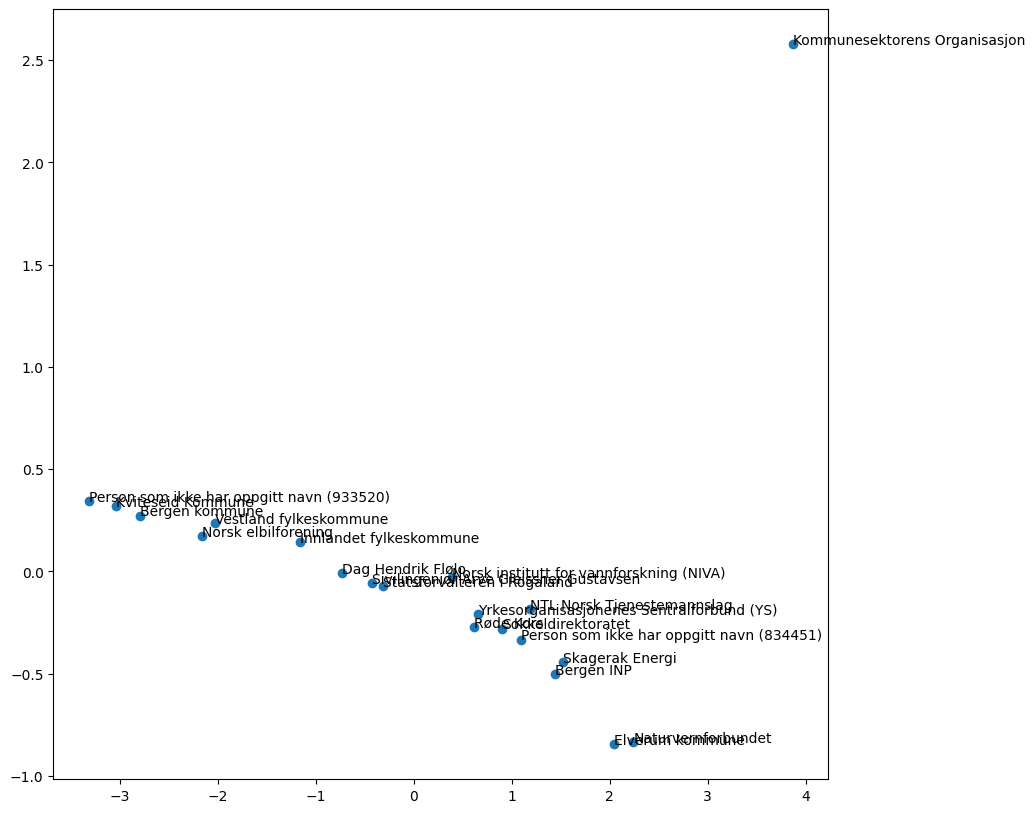

In [4]:
# Visualize the embeddings

doc_vectors = [model.infer_vector(doc) for doc in tokenized_docs]

pca = PCA(n_components=2)
doc_vec_2d = pca.fit_transform(doc_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(doc_vec_2d[:, 0], doc_vec_2d[:, 1])

for i, actor in enumerate(nou_hearings_sample["actor"]):
    plt.annotate(actor, (doc_vec_2d[i, 0], doc_vec_2d[i, 1]))